In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

My dataset comes from Kaggle and is called “Diabetes_prediction_dataset.csv” https://www.kaggle.com/datasets/mathchi/diabetes-data-set. This dataset contains 100,000 observations and 9 variables related to each individual's medical and behavioral profile. 
The observations represent people of different ages, genders, and health profiles. Each row corresponds to an individual, and each column describes a potential risk factor for diabetes


Variables: 
gender: Biological sex of the person (Male, Female, Other) Categorical

age: Age of the individual (in years) Continuous numerical

hypertension: Indicates whether the person has high blood pressure (1 = yes, 0 = no) Binary

heart_disease: Presence of heart disease (1 = yes, 0 = no) Binary

smoking_history: Smoking history (never, current, former, No Info, etc.) Categorical

bmi: Body mass index (weight / height²) Continuous numerical

HbA1c_level: Average blood glucose level over 3 months (glycated hemoglobin, % of blood) Continuous numeric

blood_glucose_level: Instantaneous blood glucose level (mg/dL) Continuous numeric

diabetes: Target variable: indicates whether the person has diabetes (1 = yes, 0 = no) Binary


Problem: 
The goal of the project is to predict the probability that an individual has diabetes based on their biological, medical, and behavioral variables. 
The explanatory variables all have proven medical relevance:

Blood glucose level and HbA1c are directly used in the diagnosis of diabetes.

BMI, age, hypertension, and heart disease are major risk factors recognized by the World Health Organization.

Smoking history and gender also influence the likelihood of developing the disease.

The goal is therefore to build a model capable of estimating the risk of diabetes based on these indicators.

This dataset is particularly interesting for machine learning studies, as it combines accurate quantitative medical data with demographic and behavioral information.
It therefore provides an ideal framework for training a reliable and scientifically relevant predictive model.

First, continuous numerical variables—such as age, BMI, HbA1c level, and blood glucose level—allow for the application of advanced classification or regression models (such as Random Forest or CatBoost), while ensuring good generalization capabilities.
Explanatory categorical variables, such as gender or smoking history, add an essential behavioral and demographic dimension, making the model more comprehensive and representative of clinical reality.

The binary target variable, indicating the presence or absence of diabetes, provides a clear learning objective that is perfectly suited to a supervised approach.
In addition, the large volume of observations (approximately 100,000 individuals) gives this dataset solid statistical validity, limiting the risk of overfitting and improving the stability of the results.
The balanced distribution between classes also reinforces the reliability of the predictions produced by the models.

Finally, from a scientific and societal perspective, this project is of major importance: it demonstrates how artificial intelligence can be used to prevent diabetes.
Analysis of this data makes it possible to:

identify the profiles of individuals at risk,

anticipate the likelihood of the disease developing,

and promote early detection in large and diverse populations.

This dataset therefore provides a solid foundation for developing predictive tools that could ultimately contribute to a better understanding and more effective management of diabetes.

# I) Generate Dataframe

In [5]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


pitch of the data and problems

show a dataframe of the data 

fit a random forest 

show feature importantes

still a tentative of interpretention

3min de presentation 

In [6]:
df.head

<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

In [7]:
df.shape

(100000, 9)

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [12]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

In [13]:
Q1 = df['HbA1c_level'].quantile(0.25)
Q3 = df['HbA1c_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['HbA1c_level'] < lower_bound) | (df['HbA1c_level'] > upper_bound)]
print(f"Number of outliers in 'HbA1c_level': {len(outliers)}")

print("\nOutlier values for HbA1c_level:")
print(outliers['HbA1c_level'].describe())


df_cleaned = df[(df['HbA1c_level'] >= lower_bound) & (df['HbA1c_level'] <= upper_bound)]


Number of outliers in 'HbA1c_level': 1315

Outlier values for HbA1c_level:
count    1315.000000
mean        8.899468
std         0.100037
min         8.800000
25%         8.800000
50%         8.800000
75%         9.000000
max         9.000000
Name: HbA1c_level, dtype: float64


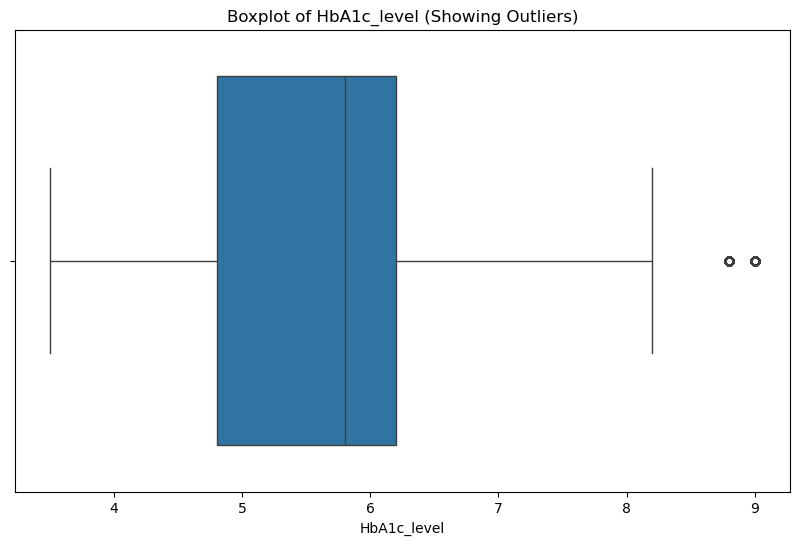

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['HbA1c_level'])
plt.title('Boxplot of HbA1c_level (Showing Outliers)')
plt.xlabel('HbA1c_level')
plt.show()

The boxplot for the HbA1c_level variable shows a relatively concentrated distribution, with very few outliers around 9%.
These extreme values are not errors but correspond to cases of severe diabetes, where glycated hemoglobin reaches very high levels.
In a medical context, these observations are essential and must be retained, as they reflect high-risk patients and improve the model's ability to detect critical situations.

In [15]:
Q1 = df['hypertension'].quantile(0.25)
Q3 = df['hypertension'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['hypertension'] < lower_bound) | (df['hypertension'] > upper_bound)]
print(f"Number of outliers in 'hypertension	': {len(outliers)}")

print("\nOutlier values for hypertension:")
print(outliers['hypertension'].describe())


df_cleaned = df[(df['hypertension'] >= lower_bound) & (df['hypertension'] <= upper_bound)]

Number of outliers in 'hypertension	': 7485

Outlier values for hypertension:
count    7485.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: hypertension, dtype: float64


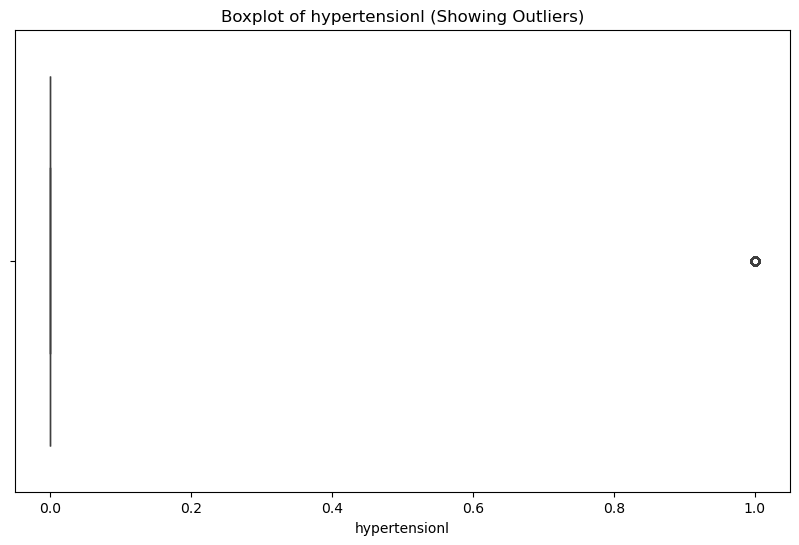

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hypertension'])
plt.title('Boxplot of hypertensionl (Showing Outliers)')
plt.xlabel('hypertensionl')
plt.show()

In [17]:
Q1 = df['heart_disease'].quantile(0.25)
Q3 = df['heart_disease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['heart_disease'] < lower_bound) | (df['heart_disease'] > upper_bound)]
print(f"Number of outliers in 'heart_disease	': {len(outliers)}")

print("\nOutlier values for heart_disease:")
print(outliers['heart_disease'].describe())


df_cleaned = df[(df['heart_disease'] >= lower_bound) & (df['heart_disease'] <= upper_bound)]

Number of outliers in 'heart_disease	': 3942

Outlier values for heart_disease:
count    3942.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: heart_disease, dtype: float64


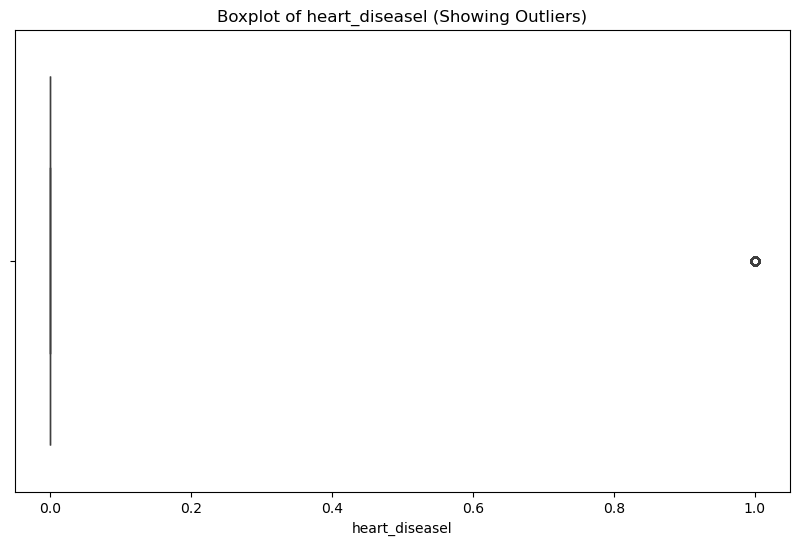

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['heart_disease'])
plt.title('Boxplot of heart_diseasel (Showing Outliers)')
plt.xlabel('heart_diseasel')
plt.show()

In [19]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(f"Number of outliers in 'bmi	': {len(outliers)}")

print("\nOutlier values for bmi:")
print(outliers['bmi'].describe())


df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

Number of outliers in 'bmi	': 7086

Outlier values for bmi:
count    7086.000000
mean       39.383956
std        12.293404
min        10.010000
25%        39.150000
50%        41.550000
75%        45.520000
max        95.690000
Name: bmi, dtype: float64


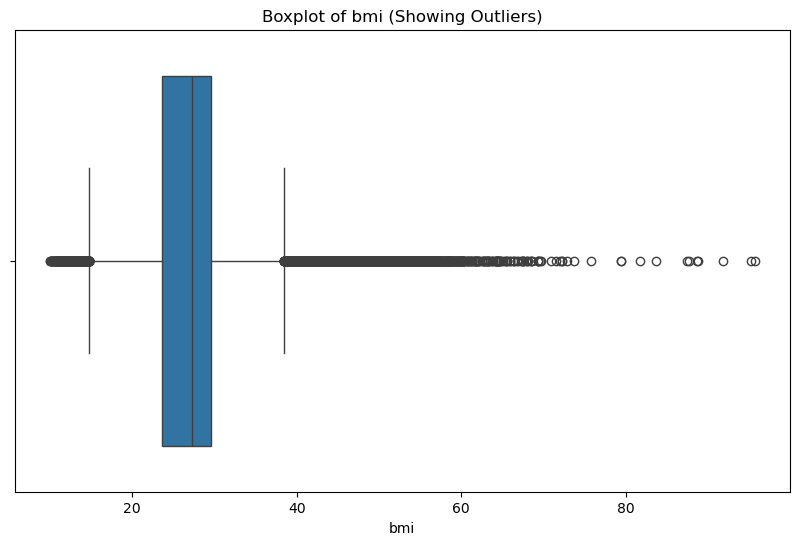

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of bmi (Showing Outliers)')
plt.xlabel('bmi')
plt.show()

In [21]:
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['blood_glucose_level'] < lower_bound) | (df['blood_glucose_level'] > upper_bound)]
print(f"Number of outliers in 'blood_glucose_level	': {len(outliers)}")

print("\nOutlier values for blood_glucose_level:")
print(outliers['blood_glucose_level'].describe())


df_cleaned = df[(df['blood_glucose_level'] >= lower_bound) & (df['blood_glucose_level'] <= upper_bound)]

Number of outliers in 'blood_glucose_level	': 2038

Outlier values for blood_glucose_level:
count    2038.000000
mean      280.382728
std        16.028042
min       260.000000
25%       260.000000
50%       280.000000
75%       300.000000
max       300.000000
Name: blood_glucose_level, dtype: float64


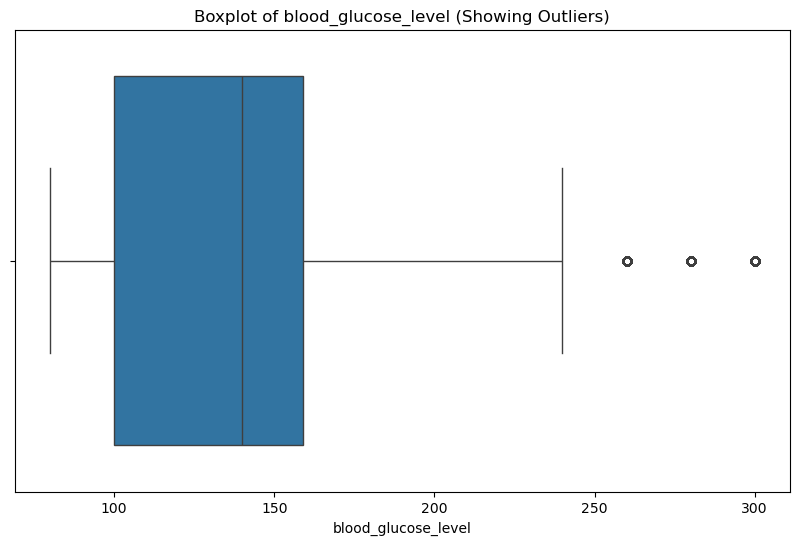

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['blood_glucose_level'])
plt.title('Boxplot of blood_glucose_level (Showing Outliers)')
plt.xlabel('blood_glucose_level')
plt.show()

In [23]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of outliers in 'age	': {len(outliers)}")

print("\nOutlier values for age:")
print(outliers['age'].describe())


df_cleaned = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

Number of outliers in 'age	': 0

Outlier values for age:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64


In [24]:
Q1 = df['diabetes'].quantile(0.25)
Q3 = df['diabetes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['diabetes'] < lower_bound) | (df['diabetes'] > upper_bound)]
print(f"Number of outliers in 'diabetes	': {len(outliers)}")

print("\nOutlier values for diabetes:")
print(outliers['diabetes'].describe())


df_cleaned = df[(df['diabetes'] >= lower_bound) & (df['diabetes'] <= upper_bound)]

Number of outliers in 'diabetes	': 8500

Outlier values for diabetes:
count    8500.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: diabetes, dtype: float64


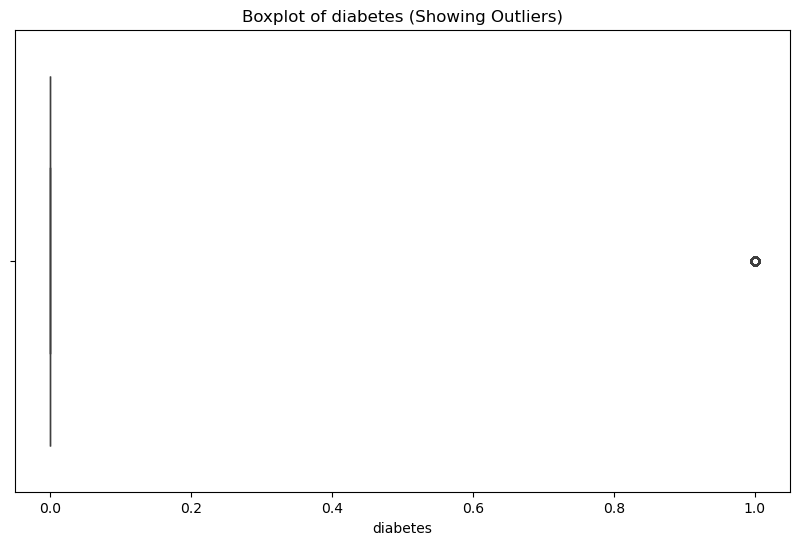

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['diabetes'])
plt.title('Boxplot of diabetes (Showing Outliers)')
plt.xlabel('diabetes')
plt.show()

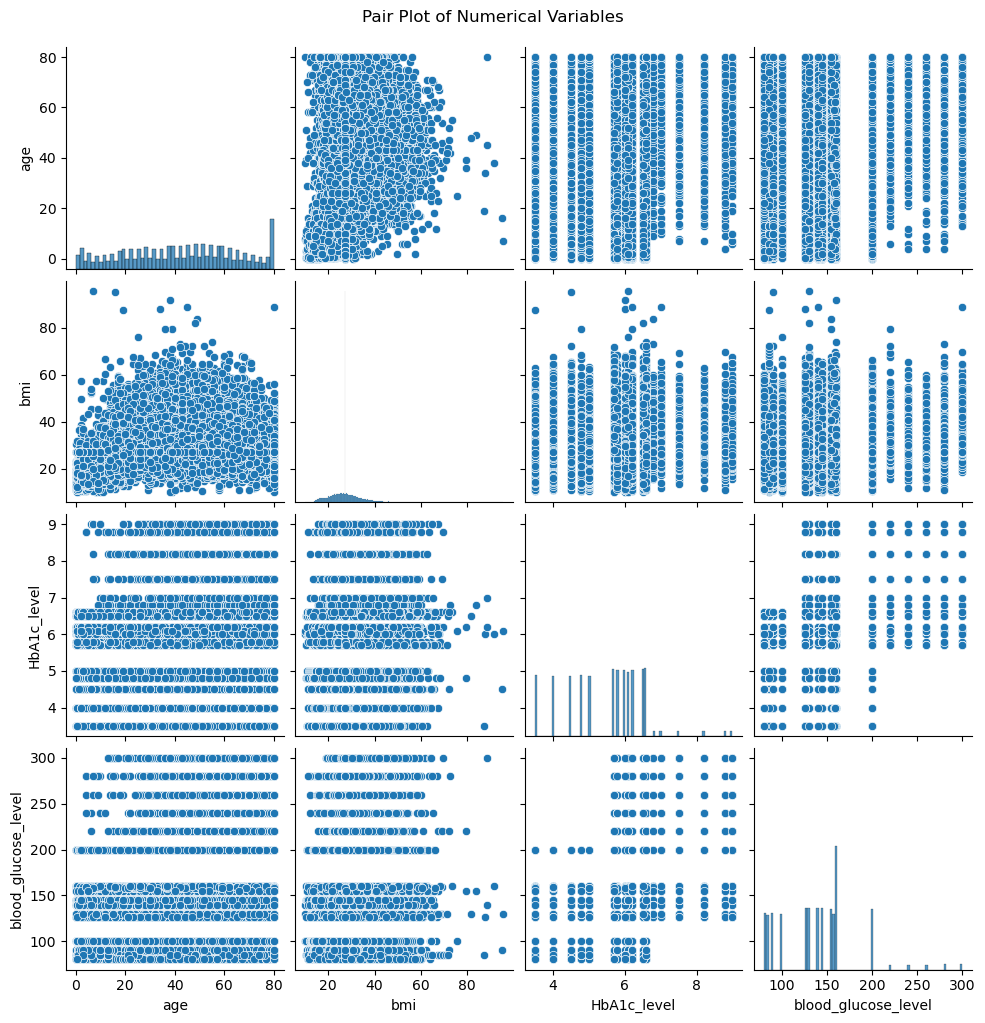

In [26]:
numerical_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]


sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


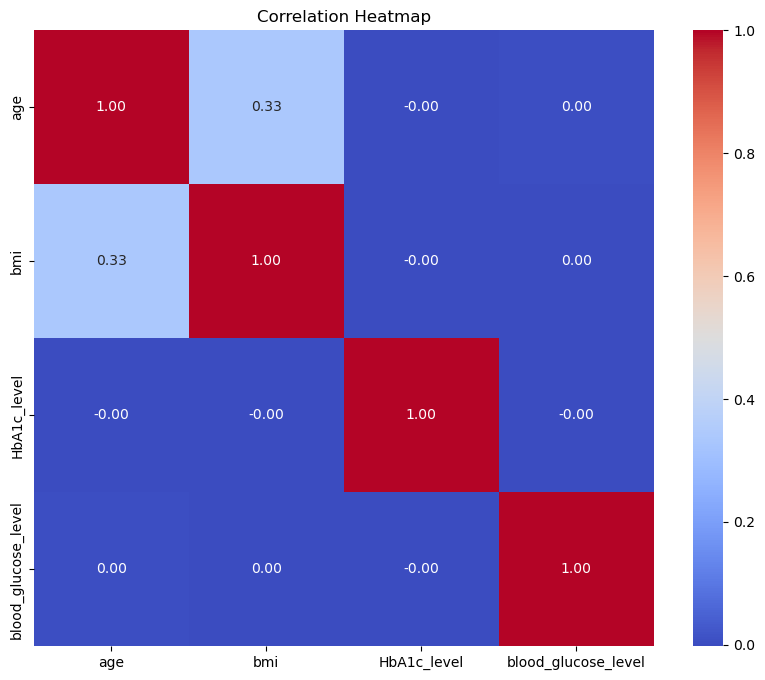

In [27]:
corr_matrix = df_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [29]:
dt = DecisionTreeClassifier(
    max_depth=None,            
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [31]:
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.40,      
    random_state=42,   
    stratify=y         
)

In [33]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_dt = dt.predict(X_test)

In [35]:
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))

Accuracy : 0.950975
Recall   : 0.7435294117647059
Precision: 0.6989217583632845
F1-score : 0.7205358415277184


The initial Decision Tree classifier achieved a recall of 74%, which is significantly lower than the performance required for this project.
Although Decision Trees are simple and interpretable models, they tend to overfit the training data and struggle to generalize well on imbalanced medical datasets.
In this context where recall is the most critical metric because missing diabetic patients (false negatives) is medically unacceptable the Decision Tree does not provide sufficient sensitivity.
Its structure is highly dependent on local splits, making it too unstable and too limited to capture the complex, non-linear relationships between medical features such as HbA1c, glucose levels, BMI, and age

# II) Random forest

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV


In [37]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
rf = RandomForestClassifier(
    n_estimators=100,       
    criterion='gini',       
    class_weight='balanced',
    random_state=42         
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.2%}")
print(f"Recall : {rec:.2%}")
print(f"Precision : {prec:.2%}")
print(f"F1-score : {f1:.2%}")

Accuracy : 96.94%
Recall : 68.62%
Precision : 93.91%
F1-score : 79.30%


My model correctly predicts 97% of cases, but it detects 69% of true diabetics.
It is very accurate (94%), so it produces almost no false alarms.
On the other hand, it remains fairly conservative: it prefers to miss some cases rather than produce false positives.
The overall balance (F1 score ≈ 79%) shows a reliable but improvable model. It has a fairly low recall for the medical sector, as it leaves 31% of true diabetics undetected.

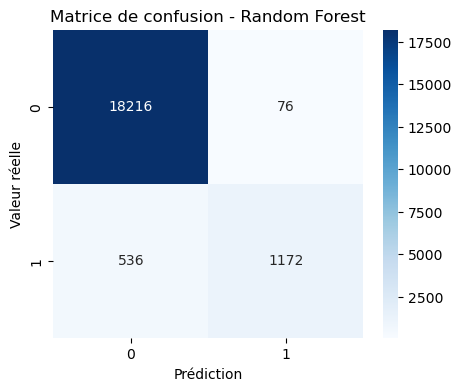

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.title("Matrice de confusion - Random Forest")
plt.show()

My confusion matrix shows that my model distinguishes non-diabetics very well:
out of more than 18,000 cases, it only misclassifies 76.
On the other hand, it misses about 536 true diabetics, so its recall is lower.
This means that it is very accurate but a little conservative: it prefers to say “non-diabetic” when it is unsure, rather than giving false alarms.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_22044\1642848818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=importances.head(10), palette="viridis")


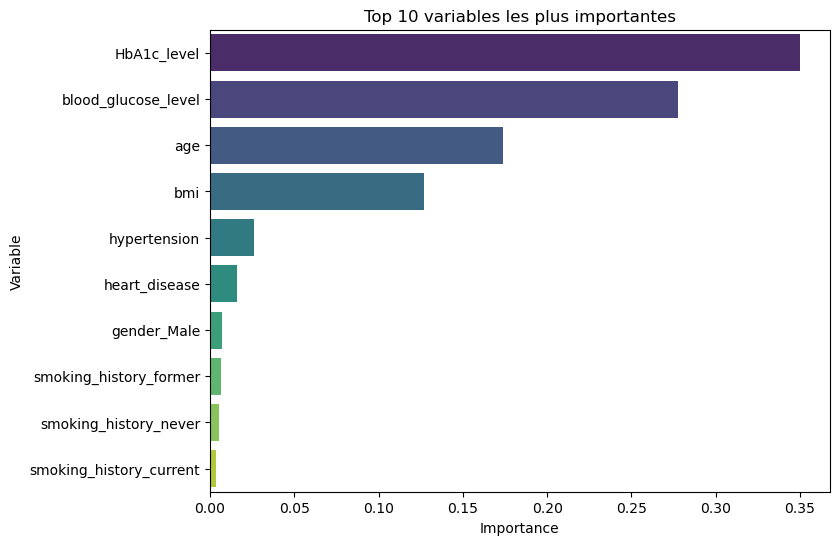

,Variable,Importance
4,HbA1c_level,0.350189
5,blood_glucose_level,0.277480
0,age,0.173630
3,bmi,0.126846
1,hypertension,0.026388
2,heart_disease,0.015912
6,gender_Male,0.006919
10,smoking_history_former,0.006780
11,smoking_history_never,0.005655
8,smoking_history_current,0.003826


In [42]:
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Variable', data=importances.head(10), palette="viridis")
plt.title("Top 10 variables les plus importantes")
plt.show()

importances.head(10)

The most important variable is HbA1c_level, which corresponds to the glycated hemoglobin level. It is an indicator of the average blood sugar level over the last three months. The higher this value, the greater the risk of diabetes.

Next is blood_glucose_level, which measures the instantaneous glucose level in the blood. This variable complements the previous one: it reflects the sugar level at the precise moment of measurement. These two variables are direct medical markers of diabetes and alone account for the majority of the model's predictions.

Age is also an important variable, as the risk of developing diabetes increases with age. BMI (body mass index) comes next: being overweight or obese are major risk factors for type 2 diabetes.

Variables such as hypertension and heart disease play a more secondary role but are still relevant. High blood pressure and heart disease are often linked to metabolic disorders, so their presence slightly increases the likelihood of being diabetic.

Finally, the variables gender and smoking_history are much less important. Being male or female, or smoking or not smoking, has little direct influence on the diagnosis, even though these factors can aggravate certain health conditions.

In summary, the Random Forest model relies mainly on biological variables (HbA1c_level and blood_glucode_level) and physical characteristics (age and BMI), which account for most of the predictive power. The other variables provide additional context but have much less influence on the final decision.



In [43]:
rf_base = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train, y_train)
y_pred_base = rf_base.predict(X_test)


In [44]:
print("Accuracy :", accuracy_score(y_test, y_pred_base))
print("Recall :", recall_score(y_test, y_pred_base))
print("Precision :", precision_score(y_test, y_pred_base))
print("F1-score :", f1_score(y_test, y_pred_base))

Accuracy : 0.965
Recall : 0.7353629976580797
Precision : 0.8351063829787234
F1-score : 0.7820672478206725


This random forest is better because it already has a better recall, going from 69% to 73.5%, so my model now detects 4.5% of diabetics. This model is less conservative than the previous one. Accuracy has decreased from 94% to 83%, so we prefer to have more false positives than false negatives. Even though accuracy has decreased slightly, the overall balance (F1-score ≈ 78%) remains stable, which shows that the model is becoming more efficient while maintaining good reliability.

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 400, 600],     
    'max_depth': [5, 10, 20, None],      
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4],       
    'max_features': ['sqrt', 'log2'],    
    'class_weight': ['balanced']        
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',     
    cv=3,                  
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_

print("Meilleurs hyperparamètres :", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Meilleurs hyperparamètres : {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}


In [ ]:
best_rf = grid_search.best_estimator_


In [77]:
import pickle
with open("model_final.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [70]:
best_rf.feature_names_in_.tolist()


['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_Male',
 'gender_Other',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [67]:
list(best_rf.feature_names_in_)


['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'gender_Male',
 'gender_Other',
 'smoking_history_current',
 'smoking_history_ever',
 'smoking_history_former',
 'smoking_history_never',
 'smoking_history_not current']

In [46]:
y_pred_best = best_rf.predict(X_test)

In [47]:
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Recall :", recall_score(y_test, y_pred_best))
print("Precision :", precision_score(y_test, y_pred_best))
print("F1 :", f1_score(y_test, y_pred_best))


Accuracy : 0.907
Recall : 0.9098360655737705
Precision : 0.4766871165644172
F1 : 0.6256038647342995


This model has a recall rate of 91%, which is excellent because it only misses 9% of diabetics. However, accuracy has fallen to 47%, meaning there are now more false positives than false negatives. 

# Catboost

In [48]:
from catboost import CatBoostClassifier


In [49]:
X_cat = df.drop("diabetes", axis=1)
y_cat = df["diabetes"]


In [50]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_cat, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

In [51]:
cat_features = ["gender","smoking_history"]
model_cat = CatBoostClassifier(
    n_estimators = 500,
    learning_rate = 0.1,
    depth = 5,
    l2_leaf_reg = 3,
    early_stopping_rounds = 50,
    random_seed = 42,
    verbose = False
)


In [52]:
model_cat.fit(
    X_train_cat,
    y_train_cat,
    cat_features=cat_features
)

In [53]:
y_pred_cat = model_cat.predict(X_test_cat)

In [54]:
print("Accuracy :", accuracy_score(y_test_cat, y_pred_cat))
print("Recall   :", recall_score(y_test_cat, y_pred_cat))
print("Precision:", precision_score(y_test_cat, y_pred_cat))
print("F1-score :", f1_score(y_test_cat, y_pred_cat))

Accuracy : 0.9721
Recall   : 0.6911764705882353
Precision: 0.972682119205298
F1-score : 0.8081155433287482


Not the best model since we are looking for maximum recall; here, the recall has fallen to 0.69, so my non-optimized CatBoost is not the best at present. Grid search is much better than the CatBoost baseline.

# Catboost optimisé

In [79]:
params = {
    'depth': [4, 6],            
    'learning_rate': [0.03],    
    'l2_leaf_reg': [3, 5],      
    'iterations': [300, 500],    
    'bagging_temperature': [0.0] 
}

In [80]:
model_cat_opt = CatBoostClassifier(
    loss_function='Logloss',
    random_seed=42,
    verbose=False,
    cat_features=cat_features     
    

)

In [81]:
model_cat_opt.grid_search(
    params,
    X_train_cat,
    y_train_cat,
    verbose=False
)


bestTest = 0.07962419202
bestIteration = 299


bestTest = 0.07976223945
bestIteration = 299


bestTest = 0.0788392486
bestIteration = 499


bestTest = 0.07901415177
bestIteration = 499


bestTest = 0.07949481353
bestIteration = 299


bestTest = 0.07943899287
bestIteration = 299


bestTest = 0.07882134635
bestIteration = 497


bestTest = 0.07886374303
bestIteration = 497

Training on fold [0/3]

bestTest = 0.08003057306
bestIteration = 455

Training on fold [1/3]

bestTest = 0.07873133979
bestIteration = 498

Training on fold [2/3]

bestTest = 0.0790764522
bestIteration = 459



{'params': {'bagging_temperature': 0,
  'depth': 6,
  'learning_rate': 0.03,
  'l2_leaf_reg': 3,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
        

In [82]:
y_pred_opt = model_cat_opt.predict(X_test_cat)

print("Accuracy :", accuracy_score(y_test_cat, y_pred_opt))
print("Recall   :", recall_score(y_test_cat, y_pred_opt))
print("Precision:", precision_score(y_test_cat, y_pred_opt))
print("F1-score :", f1_score(y_test_cat, y_pred_opt))

Accuracy : 0.97245
Recall   : 0.691764705882353
Precision: 0.9775561097256857
F1-score : 0.8101963486048915


Even after performing hyperparameter optimization with GridSearchCV, the CatBoost model did not produce a significant improvement over the baseline version.
This outcome highlights an important insight: CatBoost may already perform very well with its default settings, and additional tuning does not always guarantee better results—especially on datasets where the underlying patterns are already efficiently captured by the model.

# Features importances

In [ ]:
feature_importances = best_rf.feature_importances_

df_imp_final = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values("Importance", ascending=False)
df_imp_final

,Feature,Importance
4,HbA1c_level,0.408848
5,blood_glucose_level,0.297831
0,age,0.161793
3,bmi,0.071574
1,hypertension,0.029253
2,heart_disease,0.019211
10,smoking_history_former,0.005614
6,gender_Male,0.002256
11,smoking_history_never,0.001242
8,smoking_history_current,0.000947


Here are my important features at the end of the project to see if there have been any changes. Compared to the first important features, we can see that the variables have not changed places. But they have increased in importance, such as HbA1c_level, which has gone from 0.35 to 0.41. Each variable has increased, but only slightly.

# AUC

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

In [59]:
best_rf = CalibratedClassifierCV(best_rf, method='sigmoid')
best_rf.fit(X_train, y_train)

CalibratedClassifierCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=10,
                                                        min_samples_leaf=4,
                                                        min_samples_split=10,
                                                        n_estimators=400,
                                                        random_state=42))

In [60]:
y_proba_cal = best_rf.predict_proba(X_test)[:, 1]

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_cal)
roc_auc = auc(fpr, tpr)


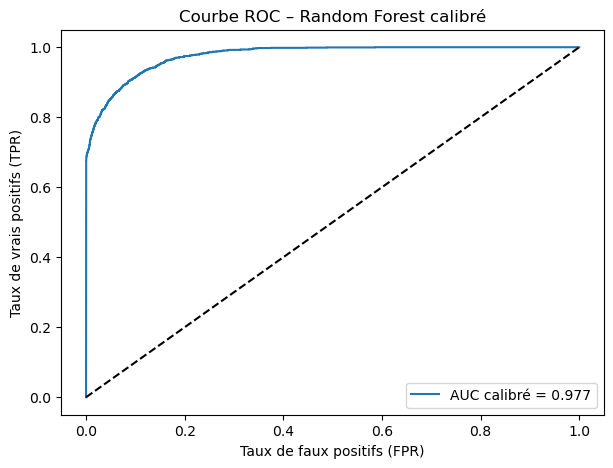

AUC  : 0.9765734185379922


In [62]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC calibré = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC – Random Forest calibré")
plt.legend()
plt.show()

print("AUC  :", roc_auc)

I calibrated my RandomForest to obtain the best possible ROC curve and AUC, and to make them more stable and representative, especially in this medical context. The ROC curve shows a very good separation between diabetics and non-diabetics, with an AUC of around 98%, so my model is able to correctly classify patients as diabetic or non-diabetic in almost 98% of cases. 

# Choix du meileur modèle

Throughout the project, I tested several models: a decision tree, a normal random forest, an optimized random forest, a grid search, a catboost, and an optimized catboost, which is a grid search. As my project is a medical project, it must have a very good recall rate in order to identify patients who are genuinely ill. Minimizing false negatives is essential in medicine because an undetected diabetic patient is at risk, while a false positive can simply be verified by an additional test. Currently, my best model predicts with 91% recall, which is excellent for a medical model. This model is the grid search.